## Práctica de Evaluación
### 👷🏻⛏ Minería de Datos y Modelización Predictiva 👷🏻⛏
#### Master Big Data & Data Science - Universidad Complutense de Madrid

**Santiago Torres Busquets**

<h2><u>Ejercicio 1</u></h2>

## 1) Estudio descriptivo de los datos

In [1]:
# tratamiento de datos
import pandas as pd
import numpy as np

# funciones predefinidas vistas en clase
import NuestrasFunciones as nf

# graficos
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#librerias estadisticas
import scipy.stats as stats
import statsmodels.api as sm

# ignorar warnings
import warnings
warnings.filterwarnings('ignore')

Le damos una vista previa a los datos.

In [2]:
# dataset
data = pd.read_csv("C:\\Users\\Santiago\\Documents\\Santiago\\Maestria\\UCM\\Modulos\\Mineria de Datos y Modelizacion Predictiva\\Tarea Mineria de Datos\\FEV_data.csv")
data.head()

seqnbr  subjid  age    fev  height  sex  smoke
0       1     301    9  1.708    57.0    2      2
1       2     451    8  1.724    67.5    2      2
2       3     501    7  1.720    54.5    2      2
3       4     642    9  1.558    53.0    1      2
4       5     901    9  1.895    57.0    1      2

In [3]:
# información del dataset
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   seqnbr  654 non-null    int64  
 1   subjid  654 non-null    int64  
 2   age     654 non-null    int64  
 3   fev     654 non-null    float64
 4   height  654 non-null    float64
 5   sex     654 non-null    int64  
 6   smoke   654 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 35.9 KB


(654, 7)

Podemos observar que no tendremos que gestionar valores perdidos.

### Valores únicos de las variables

In [4]:
# Número de valores distintos por variable
data.nunique()

seqnbr    654
subjid    654
age        17
fev       575
height     56
sex         2
smoke       2
dtype: int64

Podemos considerar que las variables *sex* y *smoke* toman valores binarios por lo que deberían considerarse como categóricas.

### Conversión a factor de las variables mal indicadas como continuas

In [5]:
# Cambiamos el tipo de esas dos variables a factores
data = data.astype({'sex': 'category', 'smoke': 'category'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   seqnbr  654 non-null    int64   
 1   subjid  654 non-null    int64   
 2   age     654 non-null    int64   
 3   fev     654 non-null    float64 
 4   height  654 non-null    float64 
 5   sex     654 non-null    category
 6   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(3)
memory usage: 27.2 KB


### Valores descriptivos por variable

In [7]:
data.describe()

seqnbr        subjid         age         fev      height
count  654.00000    654.000000  654.000000  654.000000  654.000000
mean   327.50000  37169.571865    9.931193    2.636780   61.143578
std    188.93782  23690.860350    2.953935    0.867059    5.703513
min      1.00000    201.000000    3.000000    0.791000   46.000000
25%    164.25000  15811.000000    8.000000    1.981000   57.000000
50%    327.50000  36071.000000   10.000000    2.547500   61.500000
75%    490.75000  53638.500000   12.000000    3.118500   65.500000
max    654.00000  90001.000000   19.000000    5.793000   74.000000

**Descriptivos para las categóricas**

In [8]:
data.describe(exclude=np.number)

sex  smoke
count   654    654
unique    2      2
top       1      2
freq    336    589

Podemos ver que las variables no parecen tener más defectos a corregir, solo eliminar las dos primeras columnas que corresponden a un index y a un subject_id, lo que no nos serviría para nuestro modelo.

### Reporte Descriptivo

Cont


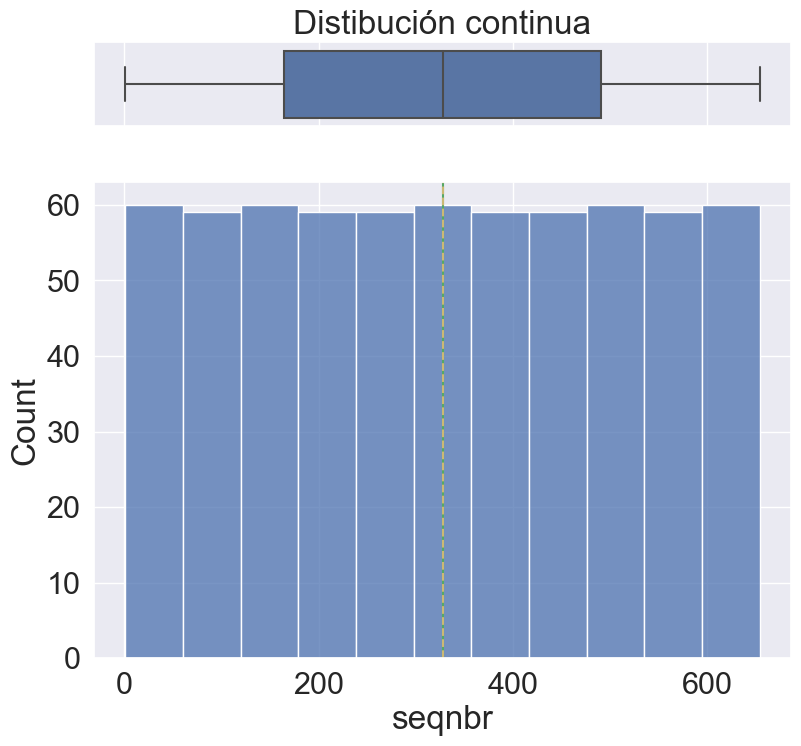

Cont


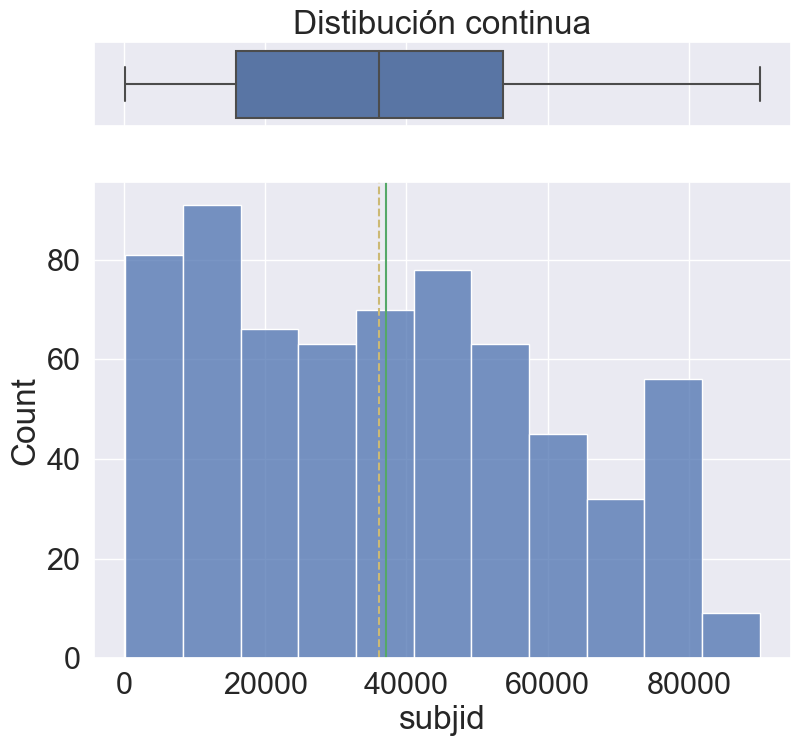

Cont


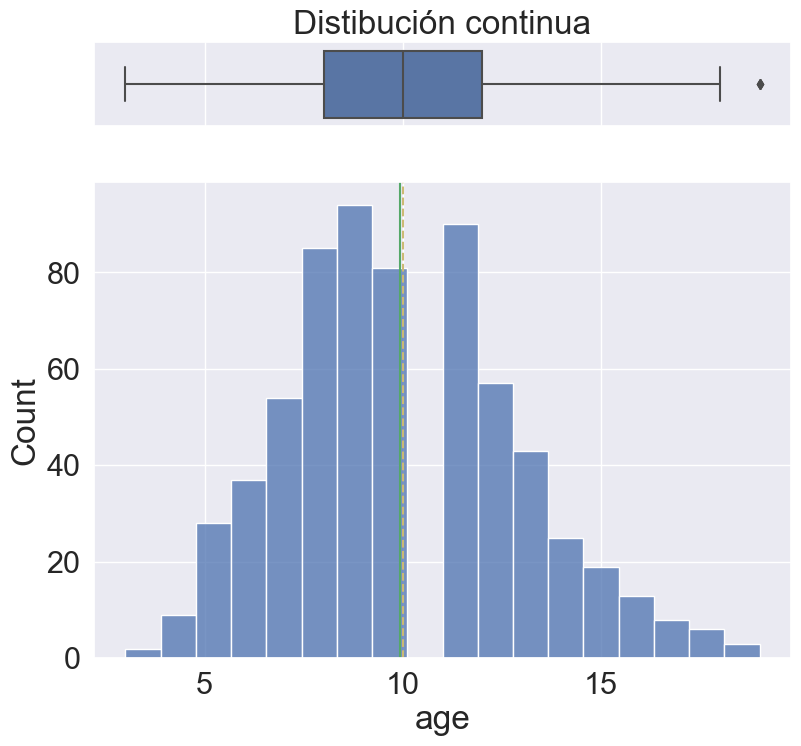

Cont


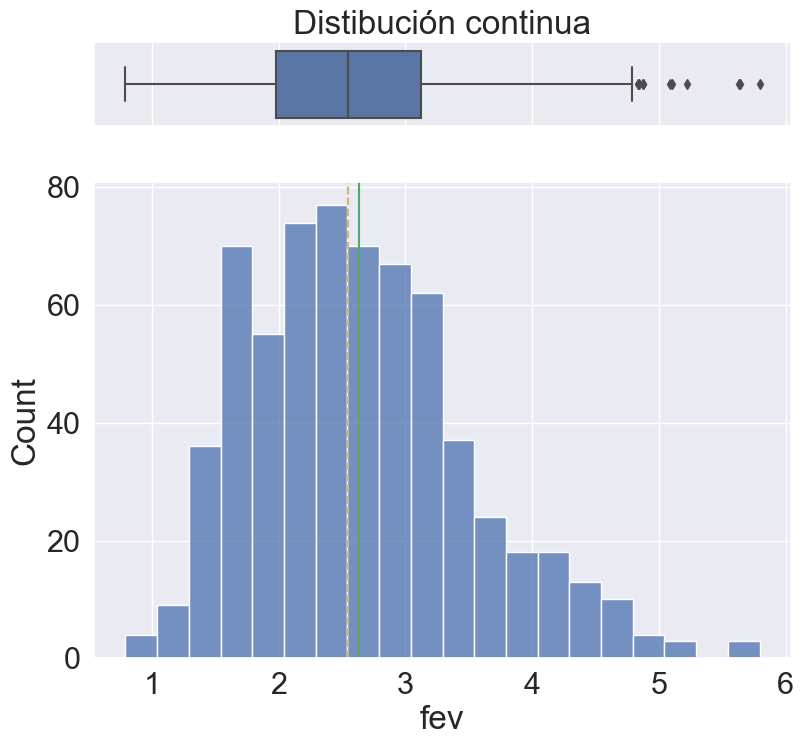

Cont


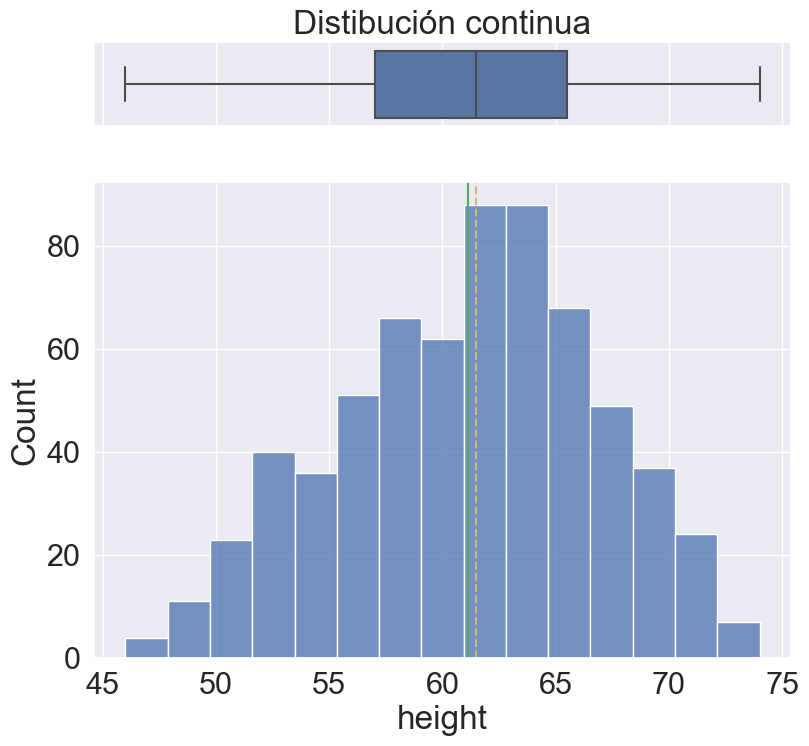

Cat
Cat


seqnbr    None
subjid    None
age       None
fev       None
height    None
sex       None
smoke     None
dtype: object

In [9]:
data.apply(nf.plot)

In [10]:
# Indico la variableObj, descarto variables índices
varObjCont = data.fev
imput = data.drop(['fev','seqnbr','subjid'],axis=1)

imput.head()

age  height sex smoke
0    9    57.0   2     2
1    8    67.5   2     2
2    7    54.5   2     2
3    9    53.0   1     2
4    9    57.0   1     2

### Valores atípicos

In [11]:
imput.skew(axis=0, numeric_only=True)

age       0.413557
height   -0.213541
dtype: float64

In [12]:
imput.select_dtypes(include=np.number).copy().apply(lambda x: nf.gestiona_outliers(x))

age
height


age  height
0  0.0     0.0
1  0.0     0.0
2  0.0     0.0

Podemos observar que las variables no se encuentran en el rango normal (-1,1) por lo que no se encuentran muy dispersas. AL mismo tiempo podemos observar que para las variables continuas no tenemos outliers que gestionar para winsorizar o imputar.

Podemos realizar también este análisis exploratorio usando **pandas_profiling**

In [13]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Podemos ver en el heatmap que hay una alta correlación entre la variable objetivo y las variables *age* y *height* y además una correlación entre los predictores entre sí.

### Transformación de las variables continuas

In [14]:
# Aplicar a las variables continuas la mejor transfromación según correlacion frente a varObjCont
transf_cor = imput.select_dtypes(include=np.number).apply(lambda x: nf.mejorTransf(x,varObjCont, tipo='cor'))
# Pedir los nombres de las transromadas
transf_cor_names = imput.select_dtypes(include=np.number).apply(lambda x: nf.mejorTransf(x,varObjCont,tipo='cor', name=True))
# Asignar nombres a las columnas de salida del proceso
transf_cor.columns = transf_cor_names.values
transf_cor

age_ident  height_sqr
0     2.032843    3.725719
1     1.694053   14.232450
2     1.355262    2.224722
3     2.032843    1.508852
4     2.032843    3.725719
..         ...         ...
649   4.404378   13.578190
650   4.065587   14.902104
651   5.081959    6.034915
652   4.404378    8.898293
653   4.065587   12.939324

[654 rows x 2 columns]

In [15]:
# Aplicar a las variables continuas la mejor transfromación según cramer frente a varObjCont
transf_cramer = imput.select_dtypes(include=np.number).apply(lambda x: nf.mejorTransf(x,varObjCont, tipo='cramer'))
transf_cramer_names = imput.select_dtypes(include=np.number).apply(lambda x: nf.mejorTransf(x,varObjCont,tipo='cramer', name=True))
transf_cramer.columns = transf_cramer_names.values
transf_cramer

age_ident  height_sqr
0     2.032843    3.725719
1     1.694053   14.232450
2     1.355262    2.224722
3     2.032843    1.508852
4     2.032843    3.725719
..         ...         ...
649   4.404378   13.578190
650   4.065587   14.902104
651   5.081959    6.034915
652   4.404378    8.898293
653   4.065587   12.939324

[654 rows x 2 columns]

Podemos observar que la variable *age* no mejora en sus transformaciones y sí lo hace un poco el cuadrado de la variable *height*.

In [16]:
# Input con transfromadas según correlación
imput_transf_cor = imput.join(transf_cor)

# Input con transfromadas según cramer
imput_transf_cramer = imput.join(transf_cramer)

Descartamos la columna *age_ident* por tratarse de la misma variable original.

In [17]:
imput2 = imput_transf_cramer.drop(['age_ident'],axis=1)
imput2.head()

age  height sex smoke  height_sqr
0    9    57.0   2     2    3.725719
1    8    67.5   2     2   14.232450
2    7    54.5   2     2    2.224722
3    9    53.0   1     2    1.508852
4    9    57.0   1     2    3.725719

In [18]:
imput2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         654 non-null    int64   
 1   height      654 non-null    float64 
 2   sex         654 non-null    category
 3   smoke       654 non-null    category
 4   height_sqr  654 non-null    float64 
dtypes: category(2), float64(2), int64(1)
memory usage: 17.0 KB


In [19]:
# Matriz de correlaciones incluyendo transformaciones
corr = imput2.join(varObjCont).corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

Utilizamos la tabla ANOVA para conocer la significancia de las variables categóricas sobre la variable objetivo.

In [20]:
# ANOVA sex
model = ols('fev ~ C(sex)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

NameError: name 'ols' is not defined

In [ ]:
# ANOVA smoke
model = ols('fev ~ C(smoke)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

### Partición training-test

In [ ]:
# Función necesaria
from sklearn.model_selection import train_test_split

# Creamos 4 objetos: predictores para tr y tst y variable objetivo para tr y tst. 
X_train, X_test, y_train, y_test = train_test_split(imput2, varObjCont, test_size=0.2, random_state=123)

# Comprobamos dimensiones
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

In [ ]:
# Genero el training con la objetivo dentro 
data_train = X_train.join(y_train)
data_train

In [ ]:
# Importamos la api para fórmulas (en concreto ols para regresión)
from statsmodels.formula.api import ols 
form = 'fev ~ age + height + smoke + sex'
# Ajusto regresión según fórmula completa
modeloC = ols(form,data=data_train).fit()
modeloC.summary()

In [ ]:
from relativeImp import relativeImp

# Nombres de las variables continuas
names=X_train.select_dtypes(include=np.number).columns.tolist()

# Calcular importancia relativa de las variable continuas en modelo (solo con variables continuas!)
df_results = relativeImp(data_train, outcomeName = 'fev', driverNames = names)

df_results.sort_values(by='normRelaImpt', ascending=False)

In [ ]:
import patsy

# Generamos las matrices de diseño según la fórmula de modelo completo
y, X = patsy.dmatrices(form, data_train, return_type='dataframe')

In [ ]:
# Ahora podemos aplicar la función "oficial" de statmodels OLS (con formato y,X)
model=sm.OLS(y,X).fit()
model.summary()

In [ ]:
# Nombres de predictores (en modo dummy) donde quitamos la constante
names=X.columns.tolist()[1:]

# Calculamos importancia relativa
df_results = relativeImp(X.join(y), outcomeName = 'fev', driverNames = names)

# Ordenamos valores 
df_results.sort_values(by='normRelaImpt', ascending=False)

In [ ]:
# Gráfico de importancia relativa en base al R2
px.bar(df_results,x='normRelaImpt',y='driver',title='Importancia relativa por aportación al R2').update_yaxes(categoryorder="total ascending").show()

In [ ]:
data_train

In [ ]:
# Proceso backward de eliminación de efectos según p-valor
form2=nf.ols_formula(data_train,'fev')

# Ajusto regresión
modeloC2 = ols(form2,data=data_train).fit()
modeloC2.summary()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones para test modelo completo
fev_y_pred = modeloC.predict(X_test)
fev_y_pred,y_test

In [ ]:
# Cálculo de performance
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, fev_y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, fev_y_pred))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones para test modelo C2
fev_y_pred = modeloC2.predict(X_test)

# Cálculo de performance
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, fev_y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, fev_y_pred))

## Validación cruzada repetida

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Establecemos esquema de validación fijando random_state (reproducibilidad)
cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=123)

# Obtenemos los resultados de R2 para cada partición tr-tst
scores = cross_val_score(model, X, y, cv=cv)

# Sesgo y varianza
print('Coeficioente de detrminación R2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [ ]:
sns.violinplot(y=scores)

In [ ]:
# Generamos las matrices de diseño según la fórmula de modelo completo
y2, X2 = patsy.dmatrices(form2, data_train, return_type='dataframe')

# Obtenemos los resultados de R2 para cada partición tr-tst
scores = cross_val_score(model, X2, y2, cv=cv)

# Sesgo y varianza
print('Coeficioente de detrminación R2 Modelo Final Backward: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

sns.violinplot(y=scores,palette='viridis')


Modelo de Regresion Lineal con interacciones

In [ ]:
form3 = 'fev ~ age + smoke + height + height_sqr + age*smoke'

# Ajusto regresión sin prop_missings
modeloC3 = ols(form3,data=data_train).fit()
modeloC3.summary()

In [ ]:
form5 = 'fev ~ age + height + sex + smoke'
form6 = 'fev ~ height + age + sex'
form7 = 'fev ~ age + sex + smoke'
form8 = 'fev ~ age + height + smoke'


# Creamos lista de fórmulas   
list_form = [form,form2,form3,form4,form5,form6,form7,form8]
list_form

# Aplicamos a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_res = pd.DataFrame(map(lambda x: nf.cross_val_lin(x,data_train, seed=2022),list_form))
list_res

In [ ]:
# Trasnponer dataframe y pasar de wide a long (creando un factor variable con el nombre de cada fórmula de la lista[0,1,2,3])
results = list_res.T.melt()
results.columns = ['Modelo','R2']
results.head()

In [ ]:
# Boxplot paralelo para comparar
sns.boxplot(x='Modelo',y='R2',data=results,palette='viridis')

### Ajuste del modelo final. Interpretación de parámetro

In [ ]:
# Ajusto regresión
modelo_final = ols(form2,data=data_train).fit()
modelo_final.summary()

<h2><u>Ejercicio 2</u></h2>

### Lectura y decomposición de la serie

In [25]:
# dataset defunciones
df = pd.read_excel("C:\\Users\\Santiago\\Documents\\Santiago\\Maestria\\UCM\\Modulos\\Mineria de Datos y Modelizacion Predictiva\\Tarea Mineria de Datos\\defunciones.xlsx")
df

Todas las causas  Tumores  Causas externas
0        1980M01             28681     4883             1277
1        1980M02             23906     4493             1122
2        1980M03             25275     4957             1244
3        1980M04             22500     4523             1214
4        1980M05             22781     4893             1228
..           ...               ...      ...              ...
463      2018M08             33177     9370             1472
464      2018M09             30293     9079             1306
465      2018M10             32879     9629             1275
466      2018M11             34338     9315             1234
467      2018M12             37033     9743             1268

[468 rows x 4 columns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0                     468 non-null    object
 1   Todas las causas  468 non-null    int64 
 2   Tumores           468 non-null    int64 
 3   Causas externas   468 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.8+ KB


In [27]:
# Convierto en serie temporal
df['Fecha'] = df.iloc[:,0].apply(lambda x: x.replace('M','-'))
df.set_index(['Fecha'],inplace=True)
df.index=pd.to_datetime(df.index)
df = df.drop([' '],axis=1)
df.head()

Todas las causas  Tumores  Causas externas
Fecha                                                 
1980-01-01             28681     4883             1277
1980-02-01             23906     4493             1122
1980-03-01             25275     4957             1244
1980-04-01             22500     4523             1214
1980-05-01             22781     4893             1228

Elijo realizar el análisis en base a la columna de todas las causas de defunciones.

## Estudio Descriptivo

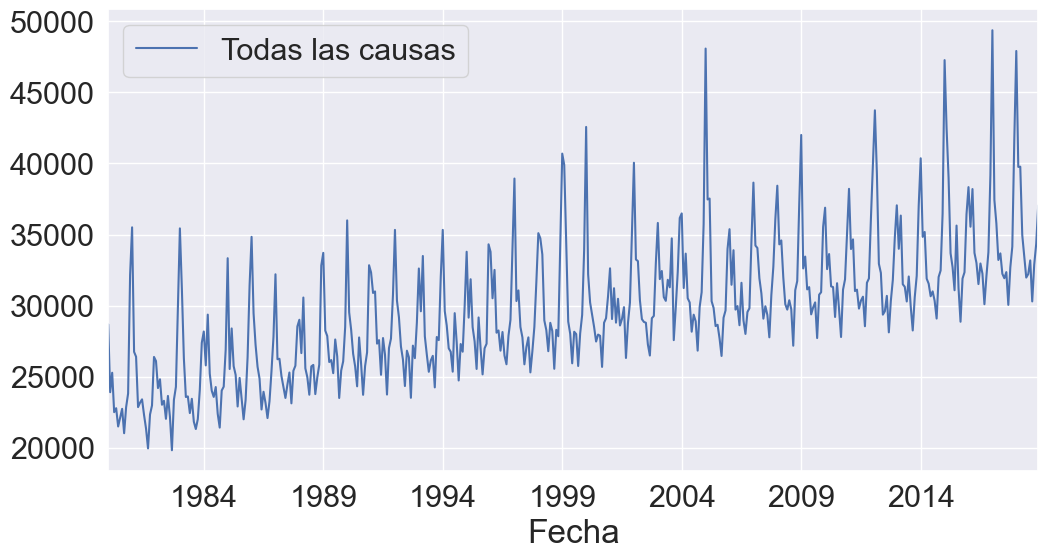

In [28]:
# Grafico con serie
plt.rcParams["figure.figsize"] = (12,6)
df['Todas las causas'].plot()
plt.legend()
plt.show()

test de Dickey Fuller para la estacionariedad de la serie al natural.

In [29]:
nf.test_stationarity(df['Todas las causas'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.942604
p-value                          0.773619
#Lags Used                      14.000000
Number of Observations Used    453.000000
Critical Value (1%)             -3.444868
Critical Value (5%)             -2.867941
Critical Value (10%)            -2.570180
dtype: float64


Para la serie "todas las causas" no podemos rechazar la hipótesis nula de no estacionariedad ya que $p > 0.05$

## Decomposición de la serie

### Decomposición aditiva

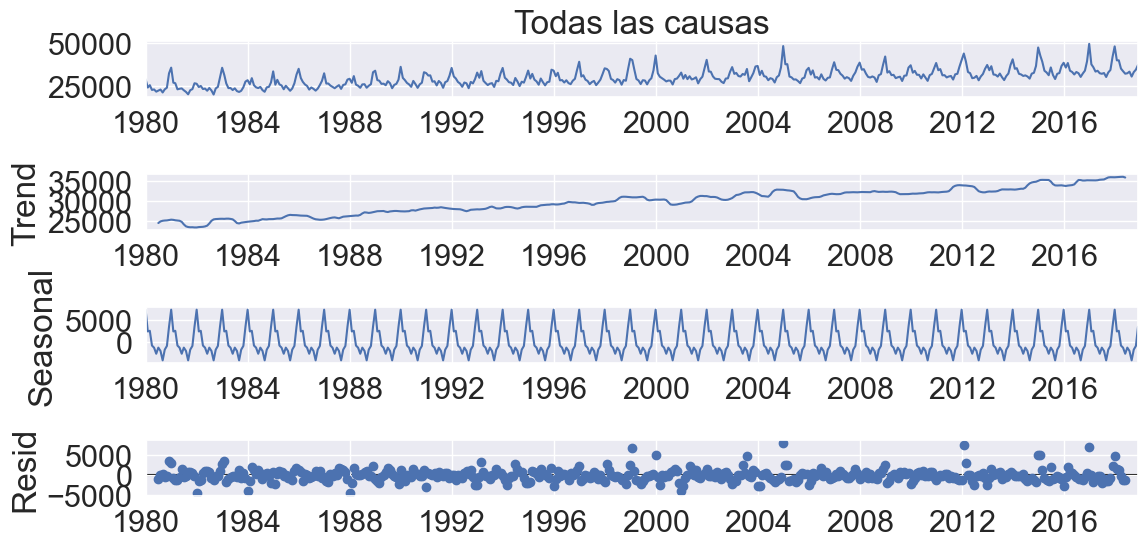

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar descomposición aditiva
def_desc_Ad = seasonal_decompose(df['Todas las causas'], model='additive',period=12)
def_desc_Ad.plot()
plt.show()

Evaluamos estacionariedad de los residuos de la descomposición aditiva.

In [31]:
nf.test_stationarity(def_desc_Ad.resid.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -9.833132e+00
p-value                        4.975783e-17
#Lags Used                     1.800000e+01
Number of Observations Used    4.370000e+02
Critical Value (1%)           -3.445403e+00
Critical Value (5%)           -2.868177e+00
Critical Value (10%)          -2.570305e+00
dtype: float64


### Decomposición multiplicativa

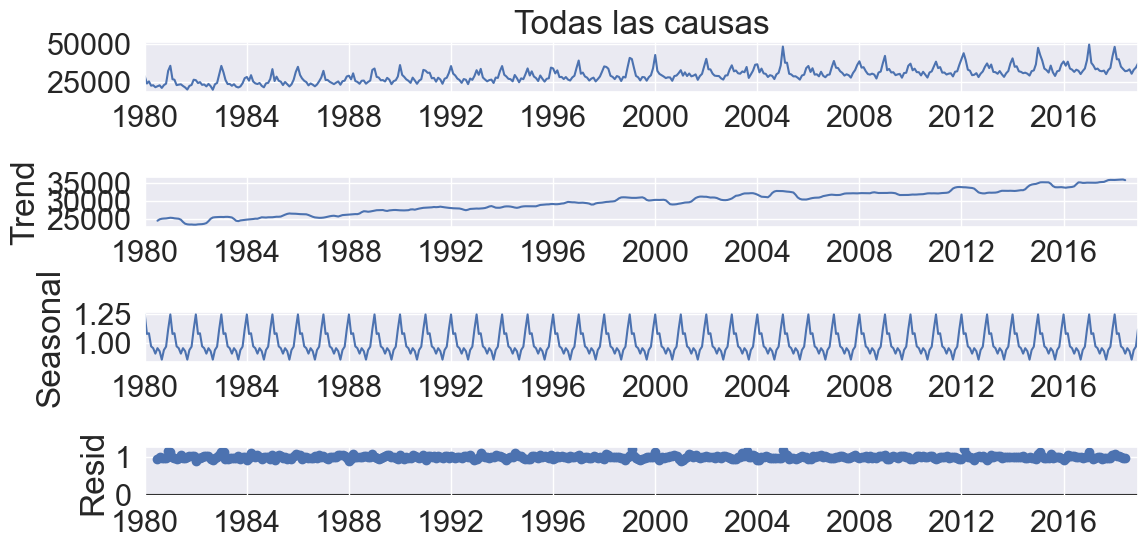

In [32]:
# Aplicar descomposición multiplicativa
def_desc_Mul = seasonal_decompose(df['Todas las causas'], model='multiplicative',period=12)
def_desc_Mul.plot()
plt.show()

Evaluamos estacionariedad de los residuos de la descomposición Multiplicativa.

In [33]:
nf.test_stationarity(def_desc_Mul.resid.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -9.977362e+00
p-value                        2.159804e-17
#Lags Used                     1.700000e+01
Number of Observations Used    4.380000e+02
Critical Value (1%)           -3.445368e+00
Critical Value (5%)           -2.868161e+00
Critical Value (10%)          -2.570297e+00
dtype: float64


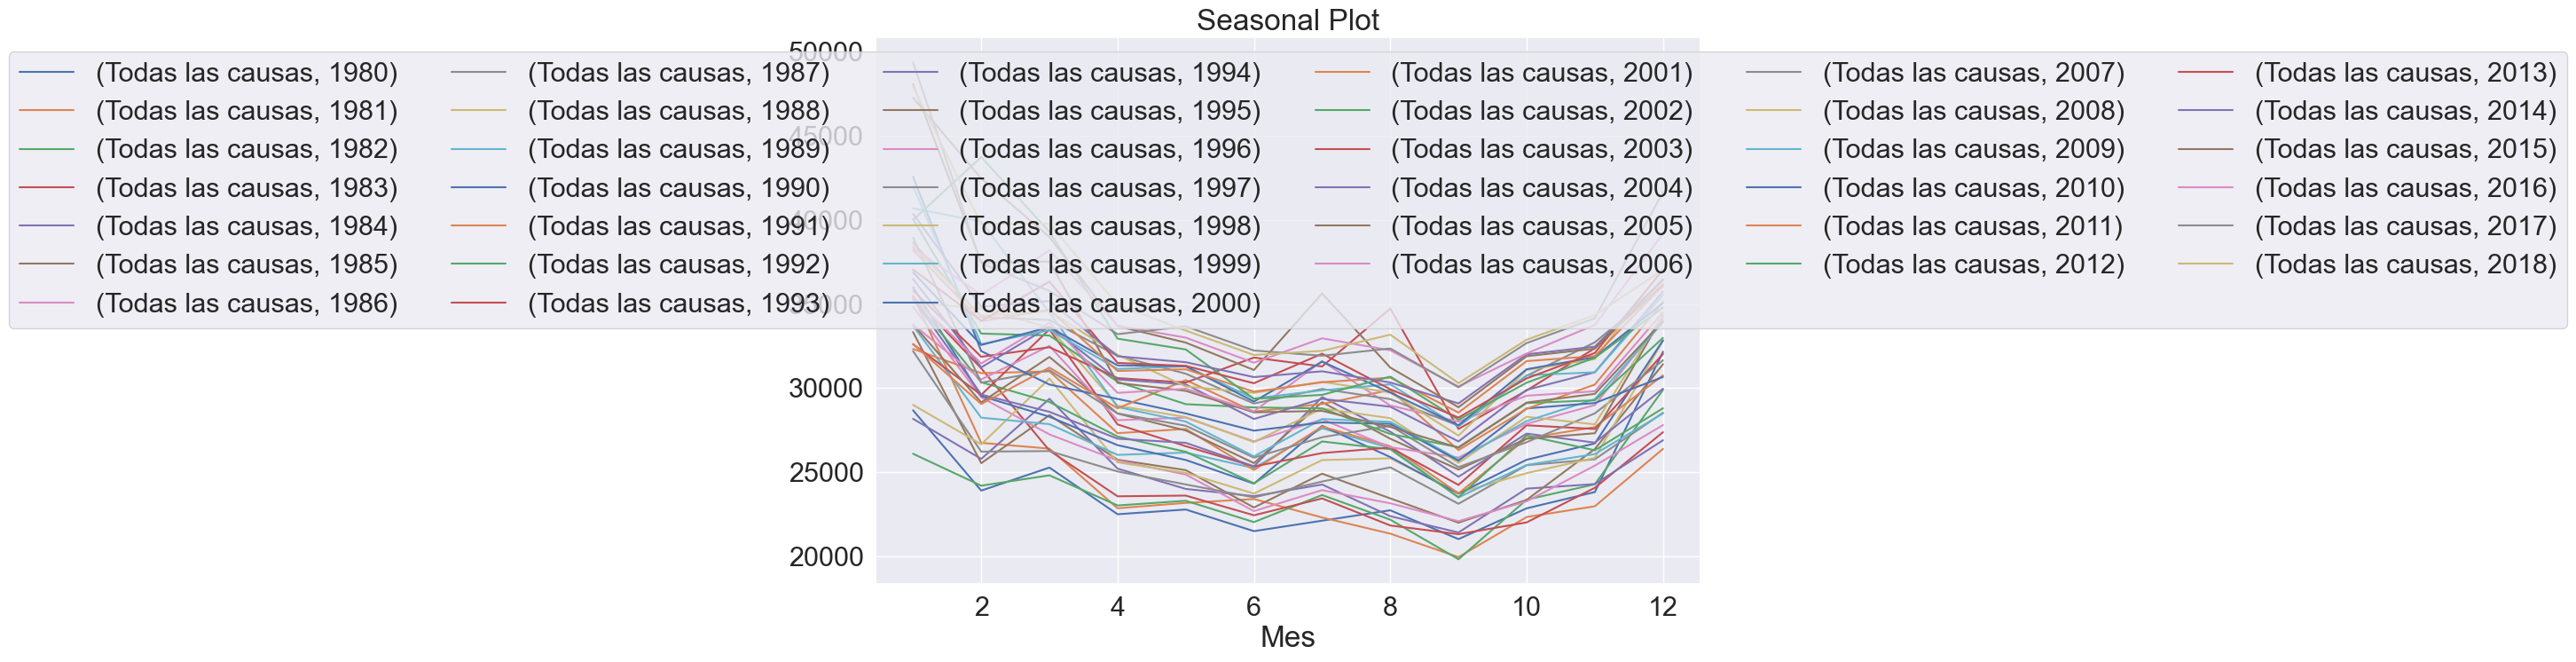

In [34]:
def_todas = df['Todas las causas']
nf.seasonal_plot(df, column="Todas las causas")
plt.rcParams["figure.figsize"] = (12,10)
plt.title('Seasonal Plot')
plt.xlabel('Mes')
plt.legend(ncol=6,loc="upper center")
plt.show()


## Estabilización de la varianza. Transformación Logaritmica

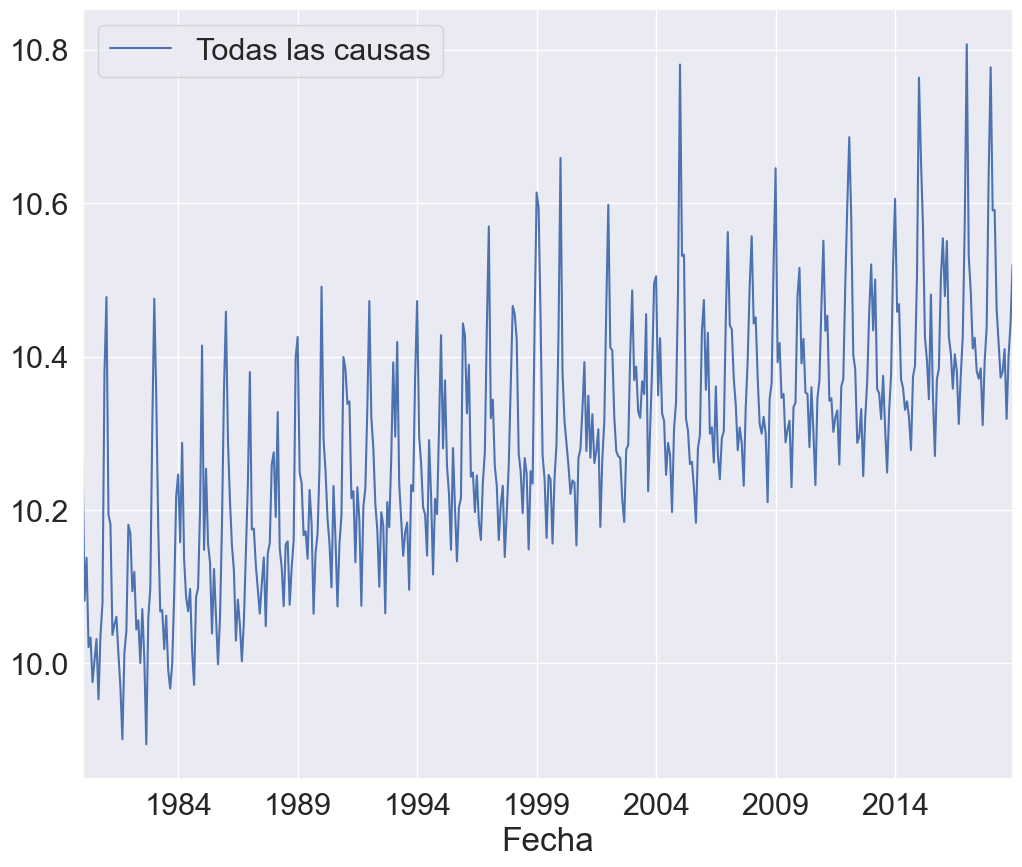

In [35]:
defLog = np.log(def_todas)
defLog.plot()
plt.rcParams["figure.figsize"] = (9,6)
plt.legend()
plt.show()

**Diferenciación regular**

In [ ]:
defLog_diff_1 = defLog.diff(periods=1)
defLog_diff_1.plot()
plt.rcParams["figure.figsize"] = (9,7)
plt.legend()
plt.show()

**Diferenciación estacional**

In [ ]:
defLog_diff_1_12 = defLog_diff_1.diff(periods=12)
defLog_diff_1_12.plot()
plt.rcParams["figure.figsize"] = (9,7)
plt.show()

**Comprobación de estacionariedad**

In [ ]:
nf.test_stationarity(defLog_diff_1_12.dropna(inplace=False))

**Autocorrelaciones**

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_acf(def_todas.dropna(inplace=False))
plt.show()

In [ ]:
plot_acf(defLog_diff_1.dropna(inplace=False))
plt.show()

In [ ]:
plot_acf(defLog_diff_1_12.dropna(inplace=False), lags=48)
plt.show()

In [ ]:
# Tets Ljung-box
sm.stats.acorr_ljungbox(defLog_diff_1_12.dropna(inplace=False), lags=[10], return_df=True)

In [ ]:
sm.stats.acorr_ljungbox(def_todas, lags=[10], return_df=True)

## Particion training y test

In [24]:
import statsmodels.tsa.holtwinters as ets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Generamos la serie logaritmica
defLog = df.copy()
defLog['Todas las causas'] = np.log(defLog['Todas las causas'])
defLog


def_tr = defLog[:'2016-12-01']
def_tst = defLog['2017-01-01':]
def_tst.iloc[:,1]

TypeError: cannot do slice indexing on RangeIndex with these indexers [2016-12-01] of type str

## Modelos de Suavizado Exponencial

**Suavizado de Holt-Winters Aditivo**

In [ ]:
# Función para evaluar modelo
def eval_model(model,tr,tst,name='Model',lags=12):
    lb = np.mean(sm.stats.acorr_ljungbox(model.resid, lags=lags, return_df=True).lb_pvalue)
    pred = model.forecast(steps=len(tst))
    fig1, ax = plt.subplots()
    ax.plot(tr, label='training')
    ax.plot(tst, label='test')
    ax.plot(pred, label='prediction')
    plt.legend(loc='upper left')
    tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
    plt.title(tit)
    plt.ylabel('Defunciones')
    plt.xlabel('Fecha')
    plt.show()
    print(lb)

hw_add = ets.ExponentialSmoothing(def_tr['Todas las causas'],trend='add', damped_trend=False, seasonal='add').fit()
hw_add.summary()
eval_model(hw_add,def_tr['Todas las causas'],def_tst['Todas las causas'],'Hw Aditivo')

**Suavizado de Holt-Winters multiplicativo**

In [ ]:
hw_mul = ets.ExponentialSmoothing(def_tr['Todas las causas'],trend='mul', damped_trend=False, seasonal='mul').fit()
hw_mul.summary()

eval_model(hw_mul,def_tr['Todas las causas'],def_tst['Todas las causas'],'Hw Multiplicativo')

**Autocorrelaciones con Intervalos de Confianza**

Correlogramas de los residuos:

In [ ]:
# autocorrelacion modelo multiplicativo
from pandas.plotting import autocorrelation_plot

plt.clf()
autocorrelation_plot(hw_mul.resid)
plt.show()

In [ ]:
# autocorrelacion modelo aditivo
plt.clf()
autocorrelation_plot(hw_add.resid)
plt.show()

## Modelos ARIMA
### ARIMA manual

In [ ]:
plot_acf(defLog_diff_1_12.dropna(inplace=False),lags=48)
plt.show()
plot_pacf(defLog_diff_1_12.dropna(inplace=False),lags=48,method='ywm')
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
arima1 = SARIMAX(def_tr['Todas las causas'], 
                order = (0, 1, 1), 
                seasonal_order =(0, 1, 1, 12))
  
arima_1 = arima1.fit()
arima_1.summary()

In [ ]:
plot_acf(arima_1.resid,lags=48)
plt.show()
plot_pacf(arima_1.resid,lags=48,method='ywm')
plt.show()

In [ ]:
eval_model(arima_1,def_tr['Todas las causas'],def_tst['Todas las causas'],'Arima 1')

nf.residcheck(arima_1.resid,12)

### ARIMA automático

In [ ]:
import pmdarima as pm

# Ajustamos modelo arima step-wise con métrica AIC para la serie de vuelos
arima_auto = pm.auto_arima(def_tr['Todas las causas'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      #start_P=None, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(arima_auto.summary())

In [ ]:
nf.eval_model_Aarima(arima_auto,def_tr['Todas las causas'],def_tst['Todas las causas'],'Auto Arima')
nf.residcheck(arima_auto.resid(),12)

# Ejercicio 4

In [ ]:
# lectura dataset
elecciones = pd.read_csv('C:\\Users\\Santiago\\Documents\\Santiago\\Maestria\\UCM\\Modulos\\Mineria de Datos y Modelizacion Predictiva\\Tarea Mineria de Datos\\wisconsin.csv')
elecciones.head()

# Ejercicio 5

In [ ]:
# lectura dataset
elecciones = pd.read_excel('C:\\Users\\Santiago\\Documents\\Santiago\\Maestria\\UCM\\Modulos\\Mineria de Datos y Modelizacion Predictiva\\Tarea Mineria de Datos\\DatosEleccionesEspaña.xlsx')

# Fijamos nombres como index de filas
elecciones.set_index(['Name'],inplace=True)
elecciones

In [ ]:
elecciones.info()

In [ ]:
elecciones.nunique()